# Video Game Sales

### The global video game industry is a billion-dollar business and has been for many years. In 2022, the revenue from the worldwide gaming market was estimated at almost 347 billion U.S. dollars, with the mobile gaming market generating an estimated 248 billion U.S. dollars of the total. (https://www.statista.com/topics/868/video-games/)   

#### By analyzing variables connected to previously released games, there might be a possibility to train a machine learning model to help predict future sales, and also what kind of games would generate the most money.

In [25]:
import pandas as pd
import numpy as np

In [26]:
# https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings/data
video_games_sales=pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

# EDA

In [28]:
# Global_Sales will be the predictor variable in this case.
# The other sales columns might be too similar/connected to Global_Sales and create overfitting? 
video_games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Explaining the column names

From the data info:

Fields include:
   
    Name - The games name    
    Platform - Platform of the games release (i.e. PC,PS4, etc.)    
    Year - Year of the game's release
    Genre - Genre of the game
    Publisher - Publisher of the game
    NA_Sales - Sales in North America (in millions)
    EU_Sales - Sales in Europe (in millions)
    JP_Sales - Sales in Japan (in millions)
    Other_Sales - Sales in the rest of the world (in millions)
    Global_Sales - Total worldwide sales.
    Critic_score - Aggregate score compiled by Metacritic staff
    Critic_count - The number of critics used in coming up with the Critic_score
    User_score - Score by Metacritic's subscribers
    User_count - Number of users who gave the user_score
    Developer - Party responsible for creating the game
    Rating - The ESRB ratings


In [30]:
# There seems to be missing values, especially at the score columns. 
# Column 13, User_Count, is missing more than 50% of the total values.
# Strings are in object type, which might be ok?
# User_Score are of type object and not float like Critics_Score.
video_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [31]:
# Missing values:
# Name, Year_of_Release and other columns with smaller count might have their rows dropped.
# The score columns are not easily dropped without risking an underfitted model.
video_games_sales.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

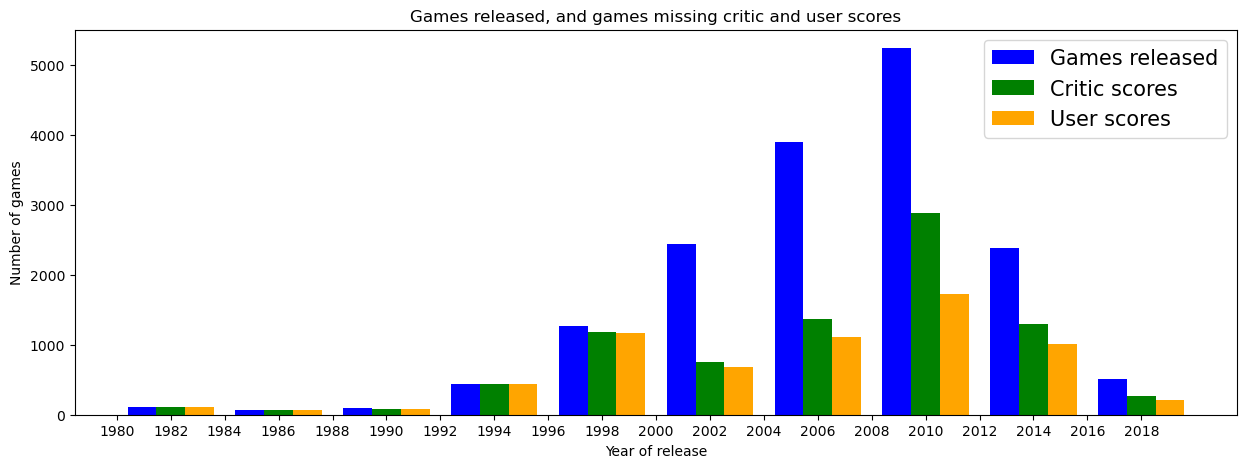

In [32]:
# What score values are missing, and why?
# Here we see that many games around the year 2010 are missing scores, and not many games in the years pre-2000 are missing scores.
# The years pre-2000 not missing many scores can however be due to there not being released as many games in that time period, as seen in tha chart below. 

import matplotlib.pyplot as plt
df = pd.DataFrame(video_games_sales)

# Make a custom list with years for better xticks.
xTicksCount = int(df.Year_of_Release.max()) - int(df.Year_of_Release.min())
tickArray = []
for i in range(xTicksCount):
    if ((int(df.Year_of_Release.min()) + i) % 2 == 0):        
        tickArray.append(int(df.Year_of_Release.min()) + i)


plt.figure(figsize=(15, 5))
x = [df.loc[df.Name.isna() == False, 'Year_of_Release'],
     df.loc[df.Critic_Score.isna(), 'Year_of_Release'],
     df.loc[df.User_Score.isna(), 'Year_of_Release']]
colors = ['blue','green', 'orange']
names = ['Games released','Critic scores', 'User scores']

n_bins = 10
plt.hist(x, n_bins, color=colors, label=names)
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.title("Games released, and games missing critic and user scores")
plt.legend(prop={'size': 15})
plt.xticks(tickArray)
plt.show()

In [43]:
# Correlation matrix, with dummy values for the categorical columns.
# Sales seems to have more correlation, which is not surprising.
# Critic count seem to have some correlation, which seem logical.

import pandas as pd
import numpy as np
df_2 = pd.get_dummies(
    data=df, 
    prefix=None, 
    prefix_sep='_', 
    dummy_na=False, 
    columns=["Platform"], 
    sparse=False, 
    drop_first=False, 
    dtype=None
)
#print(df)
corr = df_2.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,Platform_GG,Platform_N64,Platform_NES,Platform_NG,Platform_PC,Platform_PCFX,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
Year_of_Release,1.000000,-0.092562,0.003842,-0.168386,0.037700,-0.076433,0.011411,0.223407,0.175339,-0.349045,-0.027156,0.202428,-0.062694,0.111515,-0.137933,-0.126919,-0.096925,-0.096167,-0.019215,-0.189392,-0.254604,-0.055093,0.102603,-0.013909,-0.402882,-0.124771,0.217464,0.230532,0.106758,0.213694,-0.183406,-0.041116,-0.261111,-0.021547,-0.021079,0.122811,0.115853,0.164234,-0.109862,0.177762
NA_Sales,-0.092562,1.000000,0.765336,0.449598,0.638654,0.941010,0.240755,0.295413,0.246429,0.045999,-0.004337,-0.022635,-0.010911,-0.040402,0.085254,-0.009834,-0.005311,0.023701,-0.002504,0.029569,0.096446,-0.008675,-0.050838,-0.002504,0.006078,0.003240,0.011679,0.002548,-0.059386,-0.046889,-0.032577,-0.002251,-0.001057,-0.003541,-0.006133,0.040709,-0.000480,0.075189,-0.010290,0.017111
EU_Sales,0.003842,0.765336,1.000000,0.435068,0.722796,0.901239,0.220752,0.277533,0.283360,-0.018487,-0.003860,-0.009539,-0.012489,-0.043724,0.052323,-0.024164,-0.027788,0.005267,-0.002229,-0.004520,0.010801,-0.007723,0.000602,-0.002229,0.018446,0.009172,0.060266,0.065968,-0.049858,-0.037103,-0.028832,-0.003201,-0.015640,-0.003152,-0.005460,0.031193,0.004852,0.039473,-0.032147,0.015534
JP_Sales,-0.168386,0.449598,0.435068,1.000000,0.291096,0.612300,0.152593,0.180219,0.075638,-0.022503,-0.001920,0.067298,0.015739,0.004957,0.196677,-0.014744,-0.023297,0.002092,-0.000942,0.013400,0.231007,0.003680,-0.062361,-0.001192,0.035257,-0.016453,-0.016528,-0.018534,-0.012743,-0.014154,0.036050,-0.000160,0.159909,0.000085,0.009760,-0.023778,0.003325,-0.062691,-0.055981,-0.030226
Other_Sales,0.037700,0.638654,0.722796,0.291096,1.000000,0.749242,0.198554,0.251639,0.238982,-0.019420,-0.003396,-0.020766,-0.012607,-0.040731,0.014946,-0.046194,-0.037764,-0.003100,-0.001961,-0.025100,0.002818,-0.006794,-0.032444,-0.001961,-0.019566,0.087047,0.086018,0.062904,-0.019548,-0.028243,-0.025701,-0.003958,-0.021839,-0.002773,-0.004803,0.019711,-0.003458,0.031563,-0.044815,0.006848
Global_Sales,-0.076433,0.941010,0.901239,0.612300,0.749242,1.000000,0.245471,0.303571,0.265012,0.011361,-0.004329,-0.004085,-0.008171,-0.039356,0.102840,-0.021459,-0.020967,0.014214,-0.002466,0.013750,0.100623,-0.007160,-0.042789,-0.002516,0.013793,0.011824,0.032731,0.026665,-0.052329,-0.042956,-0.022419,-0.002716,0.023611,-0.003205,-0.003634,0.029211,0.001544,0.043633,-0.032378,0.008858
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,0.245471,1.000000,0.425504,0.264376,nan,nan,-0.019445,0.054777,-0.116117,nan,-0.027305,0.009026,nan,nan,nan,nan,nan,0.155019,nan,0.029013,-0.007515,0.033993,0.040066,-0.027170,0.016011,nan,nan,nan,nan,nan,-0.122688,0.013398,-0.008966,0.020008,0.045536
Critic_Count,0.223407,0.295413,0.277533,0.180219,0.251639,0.303571,0.425504,1.000000,0.362334,nan,nan,0.029161,-0.019070,-0.126476,nan,-0.171323,-0.084730,nan,nan,nan,nan,nan,0.025503,nan,-0.133368,-0.065049,0.133001,0.118753,-0.038297,0.004550,nan,nan,nan,nan,nan,-0.074979,0.032599,0.295757,0.000168,-0.014937
User_Count,0.175339,0.246429,0.283360,0.075638,0.238982,0.265012,0.264376,0.362334,1.000000,nan,nan,-0.019115,-0.005954,-0.063366,nan,-0.046266,-0.050725,nan,nan,nan,nan,nan,0.271248,nan,-0.023255,-0.093399,0.028118,0.118722,-0.056911,-0.016269,nan,nan,nan,nan,nan,-0.054867,0.012678,0.016960,-0.071106,0.034501
Platform_2600,-0.349045,0.045999,-0.018487,-0.022503,-0.019420,0.011361,nan,nan,nan,1.000000,-0.001200,-0.016044,-0.005002,-0.034418,-0.006876,-0.020363,-0.016609,-0.003733,-0.000693,-0.012489,-0.006876,-0.00240